In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, accuracy_score, plot_roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [2]:
cyber_df = pd.read_csv("dataset.csv")

## Exploratory Data Analysis:

1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 
2. Determine the number of samples present in the data, unique elements in all the features. 
3. Check if there is any null value in any features.

In [3]:
cyber_df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
cyber_df.drop("index", inplace=True, axis=1)

In [5]:
cyber_df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


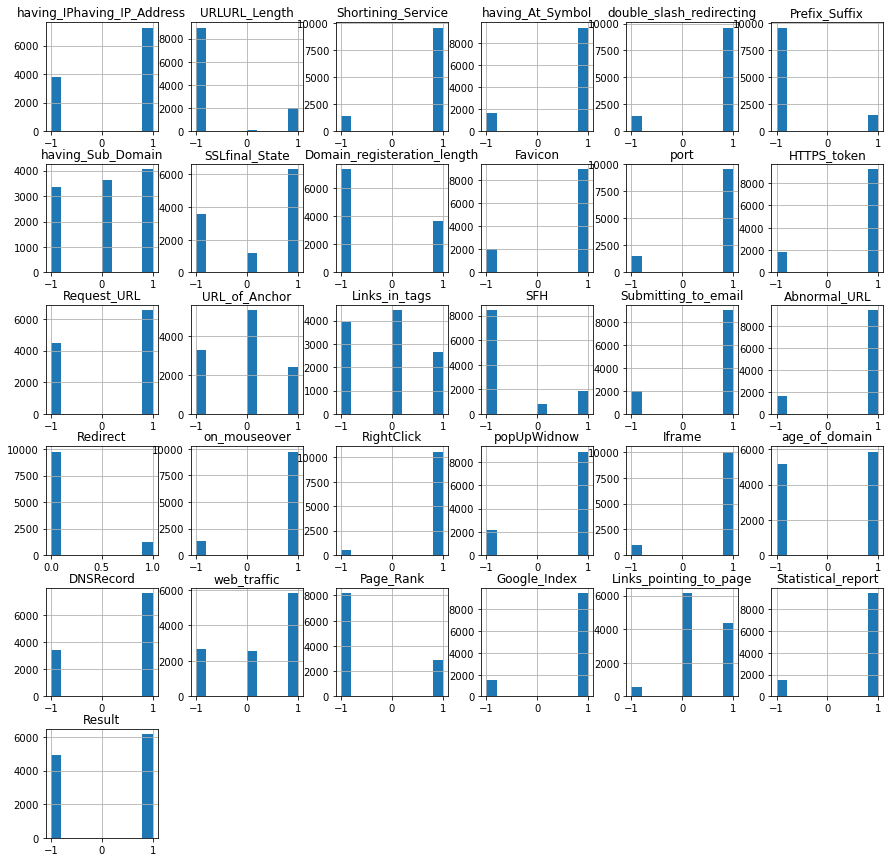

In [6]:
cyber_df.hist(figsize=[15,15])
plt.show()

In [7]:
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [8]:
cyber_df.shape

(11055, 31)

In [9]:
cyber_df.isna().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [10]:
cyber_df.nunique()

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [11]:
for i in cyber_df.columns:
    print(i, ":  ", cyber_df[i].unique(), "\n")

having_IPhaving_IP_Address :   [-1  1] 

URLURL_Length :   [ 1  0 -1] 

Shortining_Service :   [ 1 -1] 

having_At_Symbol :   [ 1 -1] 

double_slash_redirecting :   [-1  1] 

Prefix_Suffix :   [-1  1] 

having_Sub_Domain :   [-1  0  1] 

SSLfinal_State :   [-1  1  0] 

Domain_registeration_length :   [-1  1] 

Favicon :   [ 1 -1] 

port :   [ 1 -1] 

HTTPS_token :   [-1  1] 

Request_URL :   [ 1 -1] 

URL_of_Anchor :   [-1  0  1] 

Links_in_tags :   [ 1 -1  0] 

SFH :   [-1  1  0] 

Submitting_to_email :   [-1  1] 

Abnormal_URL :   [-1  1] 

Redirect :   [0 1] 

on_mouseover :   [ 1 -1] 

RightClick :   [ 1 -1] 

popUpWidnow :   [ 1 -1] 

Iframe :   [ 1 -1] 

age_of_domain :   [-1  1] 

DNSRecord :   [-1  1] 

web_traffic :   [-1  0  1] 

Page_Rank :   [-1  1] 

Google_Index :   [ 1 -1] 

Links_pointing_to_page :   [ 1  0 -1] 

Statistical_report :   [-1  1] 

Result :   [-1  1] 



In [12]:
cyber_df.duplicated().sum()

5206

## Correlation of features and feature selection:

4. Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

In [13]:
cyber_df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


In [14]:
crel = cyber_df.corr()

In [15]:
drop_feature = crel[((crel > 0.75) | (crel < -0.75)) & (crel != 1)].dropna(thresh=1).index

In [16]:
drop_feature

Index(['Shortining_Service', 'double_slash_redirecting', 'Favicon', 'port',
       'HTTPS_token', 'Submitting_to_email', 'popUpWidnow'],
      dtype='object')

In [17]:
cyber_df.drop(columns=drop_feature, inplace=True)

In [18]:
cyber_df["Result"].unique()

array([-1,  1], dtype=int64)

In [19]:
x = cyber_df.drop("Result", axis=1)
y = cyber_df["Result"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

## Building Classification Model

5. Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.
    - Build classification models using a binary classifier to detect malicious or phishing URLs.
    - Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.
    - Validate the accuracy of data by the K-Fold cross-validation technique.
    - The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

## Random Forest

In [20]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(x_test)

In [22]:
confusion_matrix(y_test, y_pred)

array([[ 923,   39],
       [  29, 1220]], dtype=int64)

In [23]:
accuracy_score(y_test, y_pred)

0.9692446856625961

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       962
           1       0.97      0.98      0.97      1249

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



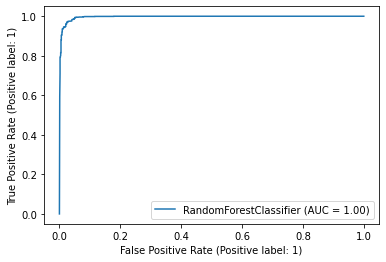

In [25]:
plot_roc_curve(estimator=rf, X=x_test, y=y_test)

In [26]:
cross_val_score(estimator=rf, X=x_test, y=y_test)

array([0.95711061, 0.93891403, 0.94570136, 0.96153846, 0.93665158])

## Linear Regression

In [27]:
lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred_lr = lr.predict(x_test)

In [29]:
confusion_matrix(y_test, y_pred_lr)

array([[ 867,   95],
       [  78, 1171]], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred_lr)

0.9217548620533695

In [31]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       962
           1       0.92      0.94      0.93      1249

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



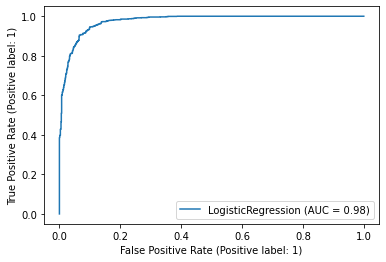

In [32]:
plot_roc_curve(estimator=lr, X=x_test, y=y_test)

## K-Nearest Neighbors

In [33]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred_knn = knn.predict(x_test)

In [35]:
confusion_matrix(y_test, y_pred_knn)

array([[ 901,   61],
       [  55, 1194]], dtype=int64)

In [36]:
accuracy_score(y_test, y_pred_knn)

0.947535052012664

In [37]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       962
           1       0.95      0.96      0.95      1249

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



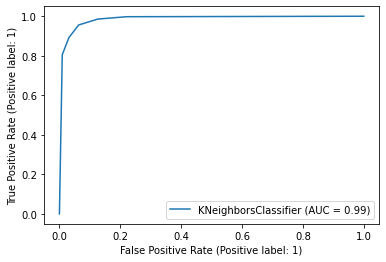

In [38]:
plot_roc_curve(estimator=knn, X=x_test, y=y_test)

In [43]:
print("Accuracy of Random Forest      |:-> ", accuracy_score(y_test, y_pred))
print("Accuracy of Logistic egression |:-> ", accuracy_score(y_test, y_pred_lr))
print("Accuracy of KNN                |:-> ", accuracy_score(y_test, y_pred_knn))

Accuracy of Random Forest      |:->  0.9692446856625961
Accuracy of Logistic egression |:->  0.9217548620533695
Accuracy of KNN                |:->  0.947535052012664


### We can clearly see that the Random Forest gives us the maximum accuracy